In [2]:
import pandas_datareader as pdr 
import pandas as pd


In [10]:
key='2a380557aa931210bbc5213ef4bdad17e00b7d36'
df=pdr.get_data_tiingo('AAPL',api_key=key)


NameError: name 'df' is not defined

In [3]:
df=pd.read_csv('F:/CPU Performance/AAPL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087894,0.087894,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10745,2023-07-28 00:00:00-04:00,194.669998,196.630005,194.139999,195.830002,48291400,0.0,0.0
10746,2023-07-31 00:00:00-04:00,196.059998,196.490005,195.259995,196.449997,38824100,0.0,0.0
10747,2023-08-01 00:00:00-04:00,196.240005,196.729996,195.279999,195.610001,35175100,0.0,0.0
10748,2023-08-02 00:00:00-04:00,195.039993,195.179993,191.850006,192.580002,50241600,0.0,0.0
10749,2023-08-03 00:00:00-04:00,191.570007,192.369995,190.839996,191.929993,25277752,0.0,0.0


In [6]:
df2=df.reset_index()['Open']

In [9]:
df2.shape

(10750,)

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

<Axes: >

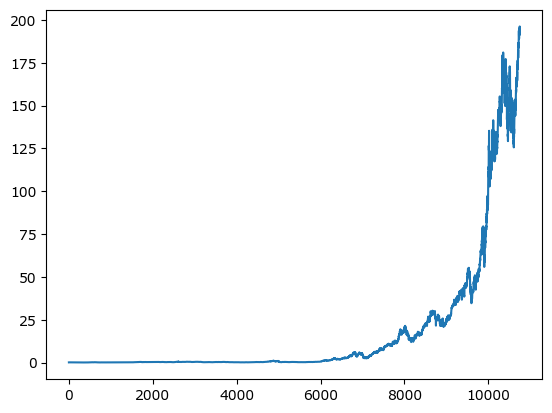

In [11]:
df2.plot()

LSTM

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [14]:
df2.shape

(10750, 1)

In [15]:
df2

array([[3.11156183e-04],
       [2.86882982e-04],
       [2.51572935e-04],
       ...,
       [1.00000000e+00],
       [9.93883776e-01],
       [9.76197945e-01]])

In [16]:
training_size=int(len(df2)*0.65)
testing_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [17]:
train_data

array([[0.00031116],
       [0.00028688],
       [0.00025157],
       ...,
       [0.02696672],
       [0.02680737],
       [0.02684295]])

In [18]:
test_data

array([[0.02679654],
       [0.0270054 ],
       [0.02705644],
       ...,
       [1.        ],
       [0.99388378],
       [0.97619795]])

In [19]:
import numpy 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [20]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,ytest=create_dataset(test_data,time_step)

In [21]:
x_train

array([[0.00031116, 0.00028688, 0.00025157, ..., 0.00030454, 0.00030233,
        0.00028909],
       [0.00028688, 0.00025157, 0.0002604 , ..., 0.00030233, 0.00028909,
        0.0002935 ],
       [0.00025157, 0.0002604 , 0.00027364, ..., 0.00028909, 0.0002935 ,
        0.00029792],
       ...,
       [0.02159814, 0.02222939, 0.02174203, ..., 0.02664956, 0.02733958,
        0.02739373],
       [0.02222939, 0.02174203, 0.02196946, ..., 0.02733958, 0.02739373,
        0.02750358],
       [0.02174203, 0.02196946, 0.02243824, ..., 0.02739373, 0.02750358,
        0.02696672]])

In [22]:
x_train.shape

(6886, 100)

In [23]:
y_train.shape

(6886,)

In [24]:
x_test.shape

(3662, 100)

In [25]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [31]:

from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow.python.util.lazy_loader'

In [26]:
model=Sequential()
model.add(LSTM(50),return_sequences=True,input_shape=(100,1))
model.add(LSTM(50),return_sequences=True)
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

NameError: name 'Sequential' is not defined